Objetivo: prever qual o risco de uma pessoa pagar ou não uma dívida

Importando bibliotecas

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# padronização
from sklearn.preprocessing import StandardScaler

# Treinamento e teste da base de dados
from sklearn.model_selection import train_test_split

# Salvando as variáveis em disco
import pickle

# Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Acurácia do algoritmo
from sklearn.metrics import accuracy_score

# Matriz de confusão
from sklearn.metrics import confusion_matrix

# Relatório
from sklearn.metrics import classification_report

# Matriz de confusão por outra biblioteca
from yellowbrick.classifier import ConfusionMatrix


Carregando os dados

In [2]:
data = '/home/uadson/repos/machine-learn/data/database/credit_data.csv'

Exploração dos dados

In [3]:
base_credit = pd.read_csv(data)
base_credit

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


Mostrando o resultado dos 10 primeiros itens do dataframe

In [4]:
base_credit.head(10)

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
5,6,24904.064140,57.471607,15.498598,0
6,7,48430.359613,26.809132,5722.581981,0
7,8,24500.141984,32.897548,2971.003310,1
8,9,40654.892537,55.496853,4755.825280,0
9,10,25075.872771,39.776378,1409.230371,0


Mostrando o resultado dos 10 últimos itens do dataframe

In [5]:
base_credit.tail(10)

,clientid,income,age,loan,default
1990,1991,34237.575419,34.101654,2658.090632,0
1991,1992,26300.446554,45.539385,2317.393678,0
1992,1993,30803.806165,23.250084,623.024153,0
1993,1994,54421.410155,26.821928,3273.631823,0
1994,1995,24254.700791,37.751622,2225.284643,0
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0
1999,2000,69436.579552,56.152617,7378.833599,0


Mostrando resultado estatístico descritivo

In [6]:
base_credit.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


Retornando linha em que conste o maior valor de renda

In [7]:
base_credit[base_credit['income'] >= 69995.685578]
# max(base_credit['income'])

,clientid,income,age,loan,default
422,423,69995.685578,52.719673,2084.370861,0


Retornando linha em que conste o menor valor de dívida

In [8]:
base_credit[base_credit['loan'] <= 1.377630	]

,clientid,income,age,loan,default
865,866,28072.604355,54.142548,1.37763,0


Coluna default é a coluna de classificação dos dados, sendo que 0 é nenhum risco e 1 risco, de não efetuar o pagamento da dívida

In [9]:
np.unique(base_credit['default'], return_counts=True)

(array([0, 1]), array([1717,  283]))

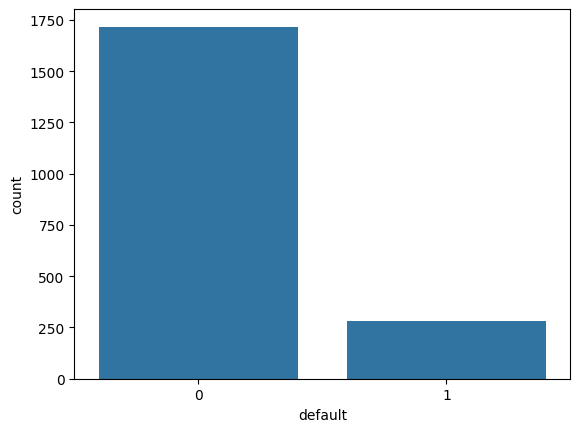

In [10]:
sns.countplot(x = base_credit['default']);

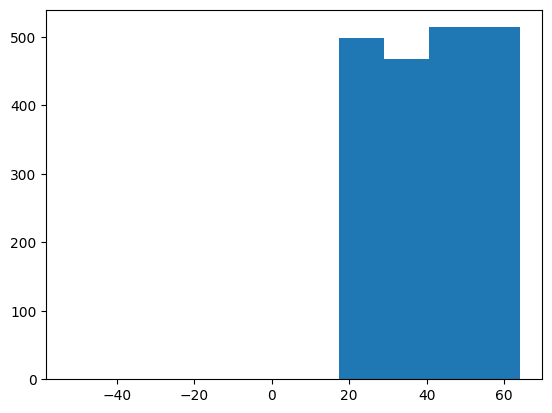

In [11]:
# Histograma: quantidade de pessoas x idade
plt.hist(x = base_credit['age']);

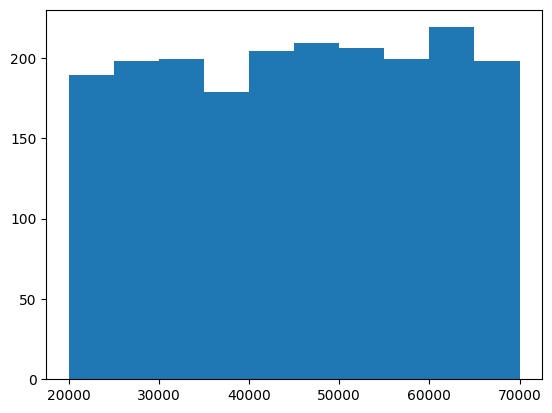

In [12]:
# Histograma quantidade de pessoas X salário anual
plt.hist(x = base_credit['income']);

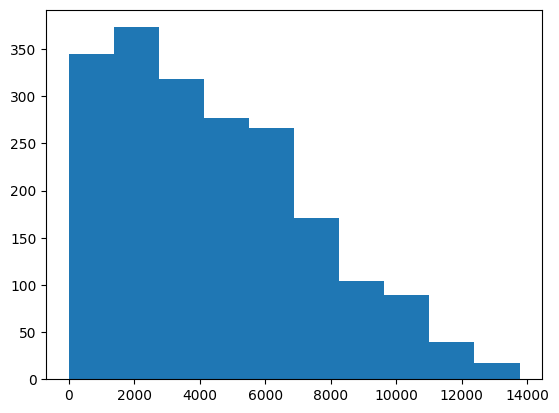

In [13]:
# Histograma quantidade pessoas x valor da dívida.
plt.hist(x = base_credit['loan']);

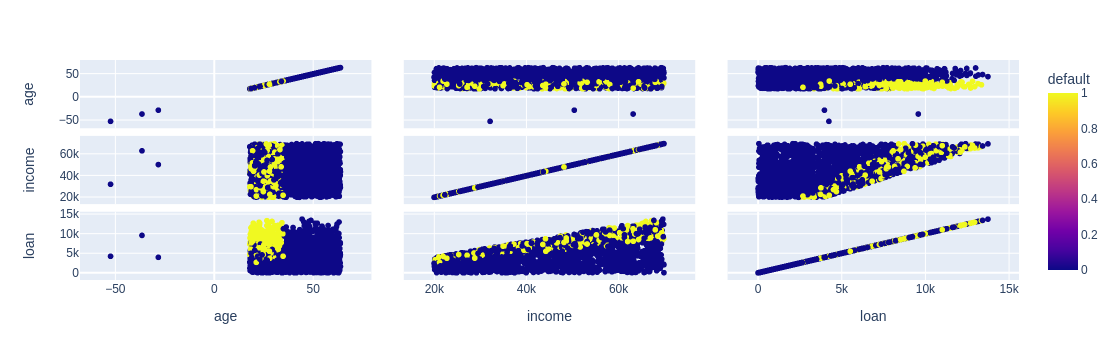

In [14]:
graphic = px.scatter_matrix(base_credit, dimensions=['age', 'income', 'loan'], color='default')
graphic.show()

Corrigindo dados inconsistentes

In [15]:
base_credit.loc[base_credit['age'] < 0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


1ª opção

In [16]:
# Apagar a coluna inteira (de todos os registros da base de dados)
# axis 0, para linhas, axis 1, para colunas
base_credit2 = base_credit.drop('age', axis=1)
base_credit2

,clientid,income,loan,default
0,1,66155.925095,8106.532131,0
1,2,34415.153966,6564.745018,0
2,3,57317.170063,8020.953296,0
3,4,42709.534201,6103.642260,0
4,5,66952.688845,8770.099235,1
...,...,...,...,...
1995,1996,59221.044874,1926.729397,0
1996,1997,69516.127573,3503.176156,0
1997,1998,44311.449262,5522.786693,1
1998,1999,43756.056605,1622.722598,0


2ª Opção

In [17]:
# Indices
print(base_credit.index)
# Apagar somente os registros com valores inconsistentes, neste caso somente as linhas
base_credit3 = base_credit.drop(base_credit[base_credit['age'] < 0].index)

print(base_credit3.index)
base_credit3

RangeIndex(start=0, stop=2000, step=1)
Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999],
      dtype='int64', length=1997)


,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [18]:
base_credit3.loc[base_credit3['age'] < 0]

,clientid,income,age,loan,default


3ª Opção

In [19]:
# Preencher os valores inconsistentes manualmente

4ª Opção

In [20]:
# Substituir os valores inconsistentes com a média obtidade entre eles
base_credit.mean()

clientid     1000.500000
income      45331.600018
age            40.807559
loan         4444.369695
default         0.141500
dtype: float64

In [21]:
# Aqui neste caso, foi considerado os valores negativos
base_credit['age'].mean()

40.80755937840458

In [22]:
# Obtendo a média somente dos valores positivos
base_credit['age'][base_credit['age'] > 0].mean()

40.92770044906149

In [23]:
# Atribuindo os valores (média) aos registros inconsistentes
base_credit.loc[base_credit['age'] < 0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [24]:
base_credit.loc[base_credit['age'] < 0, 'age'] = 40.92

In [25]:
base_credit.loc[base_credit['age'] < 0]

,clientid,income,age,loan,default


In [26]:
base_credit.head(27)

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
5,6,24904.064140,57.471607,15.498598,0
6,7,48430.359613,26.809132,5722.581981,0
7,8,24500.141984,32.897548,2971.003310,1
8,9,40654.892537,55.496853,4755.825280,0
9,10,25075.872771,39.776378,1409.230371,0


Tratamento de dados faltantes

In [27]:
base_credit.isnull() # True = dado faltante, False = dado existente

,clientid,income,age,loan,default
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1995,False,False,False,False,False
1996,False,False,False,False,False
1997,False,False,False,False,False
1998,False,False,False,False,False


In [28]:
base_credit.isnull().sum() # soma os registros True e sua localização

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [29]:
base_credit.loc[pd.isnull(base_credit['age'])] # retorna os elementos nos quais existem valores nulos

,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [30]:
# preenchendo os valores faltantes com média das idades
base_credit['age'].fillna(base_credit['age'].mean(), inplace = True)

/tmp/ipykernel_165406/3109063603.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [31]:
base_credit.loc[pd.isnull(base_credit['age'])]

,clientid,income,age,loan,default


In [32]:
# consultando os ids com os novos dados 
base_credit.loc[(base_credit['clientid'] == 29) | (base_credit['clientid'] == 31) | (base_credit['clientid'] == 32)]

,clientid,income,age,loan,default
28,29,59417.805406,40.927689,2082.625938,0
30,31,48528.852796,40.927689,6155.784670,0
31,32,23526.302555,40.927689,2862.010139,0


In [33]:
# consultando os mesmos dados, porém de uma maneira mais simples
base_credit.loc[base_credit['clientid'].isin([29, 31, 32])]

,clientid,income,age,loan,default
28,29,59417.805406,40.927689,2082.625938,0
30,31,48528.852796,40.927689,6155.784670,0
31,32,23526.302555,40.927689,2862.010139,0


Divisão entre previsores e classe

Previsores = income, age, loan

Classe = default


Com base nos dados históricos de income, age e loan, o algoritmo tentará prever o risco de um cliente pagar ou não o empréstimo (default)

Variáveis previsoras -> X Variáveis de classe -> Y

In [34]:
X_credit = base_credit.iloc[:, 1:4].values

# X_credit = variável
# base_credit = dataframe -> colunas (clientid, income, age, loan, default)
# base_credit.iloc[linhas, colunas] = filtro de consulta com base em indices de linhas e colunas (parâmetros)
# base_credit.iloc[:, 1:4] = consulta todas as linhas das colunas slices 1 a 4 (income, age, loan)
# .values = converte no formato do numpy


In [35]:
X_credit

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [36]:
print(type(base_credit), type(X_credit))

<class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'>


In [37]:
y_credit = base_credit.iloc[:, 4].values

In [38]:
y_credit

array([0, 0, 0, ..., 1, 0, 0])

Escalonamento dos Valores

In [39]:
X_credit[:, 0].min(), X_credit[:, 1].min(), X_credit[:, 2].min()

(20014.4894700497, 18.055188510566897, 1.37762959325451)

In [40]:
X_credit[:, 0].max(), X_credit[:, 1].max(), X_credit[:, 2].max()

(69995.6855783239, 63.971795841120205, 13766.0512393337)

Padronização (Standardisation) - mais indicada quando há outliers na base de dados

x = x - média(x) / desvio padrão(x)

Normalização (Normalization)

x = x - mínimo(x) / máximo(x) - mínimo(x)

In [41]:
scaler_credit = StandardScaler()

X_credit = scaler_credit.fit_transform(X_credit)

Comparação

In [42]:
X_credit[:, 0].min(), X_credit[:, 1].min(), X_credit[:, 2].min()

(-1.7676158019964077, -1.7264145408889917, -1.4592791099462408)

In [43]:
X_credit[:, 0].max(), X_credit[:, 1].max(), X_credit[:, 2].max()

(1.7220222385319197, 1.7393673928651967, 3.0616609141708273)

In [44]:
X_credit

array([[ 1.45393393,  1.36538093,  1.20281942],
       [-0.76217555,  0.5426602 ,  0.69642695],
       [ 0.83682073,  1.67417189,  1.17471147],
       ...,
       [-0.07122592, -0.97448519,  0.35420081],
       [-0.11000289,  1.73936739, -0.92675625],
       [ 1.682986  ,  1.14917639,  0.96381038]])

Divisão das bases em treinamento e teste

In [45]:
# Base previsora
X_credit

array([[ 1.45393393,  1.36538093,  1.20281942],
       [-0.76217555,  0.5426602 ,  0.69642695],
       [ 0.83682073,  1.67417189,  1.17471147],
       ...,
       [-0.07122592, -0.97448519,  0.35420081],
       [-0.11000289,  1.73936739, -0.92675625],
       [ 1.682986  ,  1.14917639,  0.96381038]])

In [46]:
# Classe
y_credit

array([0, 0, 0, ..., 1, 0, 0])

In [47]:
# Divisão da base - maior percentual de teste, base de dados pequena

X_credit_train, X_credit_test, y_credit_train, y_credit_test = train_test_split(X_credit, y_credit, test_size=0.25, random_state=0)

In [48]:
def shape_validation(data):
    try:
        return data.shape[1]
    except IndexError:
        return 1

In [49]:
print(f'Dados de treino 75%: {X_credit_train.shape[0]} linha(s) e {X_credit_train.shape[1]} coluna(s) => {X_credit_train.shape}')
print(f'Dados de treino 75%: {y_credit_train.shape[0]} linhas (e) {shape_validation(y_credit_train)} coluna(s) => {y_credit_train.shape}')

Dados de treino 75%: 1500 linha(s) e 3 coluna(s) => (1500, 3)
Dados de treino 75%: 1500 linhas (e) 1 coluna(s) => (1500,)


In [50]:
print(f'Dados de teste 25%: {X_credit_test.shape[0]} linha(s) e {shape_validation(X_credit_test)} coluna(s) => {X_credit_test.shape}')
print(f'Dados de teste 25%: {y_credit_test.shape[0]} linha(s) e {shape_validation(y_credit_test)} coluna(s) => {y_credit_test.shape}')

Dados de teste 25%: 500 linha(s) e 3 coluna(s) => (500, 3)
Dados de teste 25%: 500 linha(s) e 1 coluna(s) => (500,)


In [51]:
# Salvando as variáveis de treino e teste

with open('credit.pkl', mode= 'wb') as file:
    pickle.dump([X_credit_train, y_credit_train, X_credit_test, y_credit_test], file)

Aplicando o algorítmo de Naive Bayes a base de dados

In [52]:
# carregando os dados

with open('/home/uadson/repos/machine-learn/predictive/classification/credit.pkl', 'rb') as data:
    X_credit_train, y_credit_train, X_credit_test, y_credit_test = pickle.load(data)

In [56]:
# treinando com os dados
naive_credit_data = GaussianNB()
naive_credit_data.fit(X_credit_train, y_credit_train)

# X_credit_train, y_credit_train = base de treinamento
# X_credit_test = dados para teste
# y_credit_test = dados reais

GaussianNB()

In [57]:
predictions = naive_credit_data.predict(X_credit_test)

In [62]:
# resposta do algorítmo
# classe 0 = clientes que pagam
# classe 1 = clientes que não pagam
predictions

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [60]:
# respostas reais
y_credit_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [64]:
# Medindo a acurácia do algorítmo
accuracy_score(y_credit_test, predictions)

0.938

In [66]:
confusion_matrix(y_credit_test, predictions)

"""
0   428    8

1    23   41

     0     1
     
0 <> 0 clientes que pagam = acertos 428
0 <> 1 clientes que pagam mas que foram classificados como que não pagam = erros 8
1 <> 0 clientes que não pagam mas que foram classificados como que pagam = erros 21
1 <> 1 clientes que não pagam = acertos 41   
"""

array([[428,   8],
       [ 23,  41]])

0.938

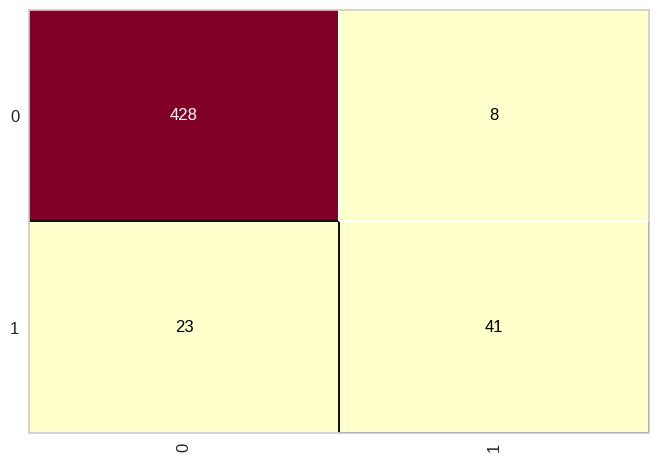

In [68]:
cm = ConfusionMatrix(naive_credit_data)
cm.fit(X_credit_train, y_credit_train)
cm.score(X_credit_test, y_credit_test)

In [70]:
print(classification_report(y_credit_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500

